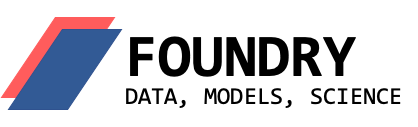

# Foundry Iris Tutorial for Beginners
This introduction uses Foundry to:


1.   Load data from Foundry
2.   Use a predictive model from Foundry
3.   Create local metadata and dataframe

This notebook is set up to run as a [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=5fCEDCU_qrC0) notebook, which allows you to run python code in the browser, or as a [Jupyter](https://jupyter.org/) notebook, which runs locally on your machine.

The code in the next cell will detect your environment to make sure that only cells that match your environment will run.

In [1]:
try:
  import google.colab
  no_local_server = True
  no_browser = True
  globus = False
except: # when not in google colab
  no_local_server = False
  no_browser = False
  globus = True

# Installing Foundry
First we'll need to install Foundry and [MDF](https://materialsdatafacility.org/). If you're running the notebook locally, just make sure that Foundry and MDF are installed in your local environment. If you're using Google Colab, run the code below to install.

*Due to a recent FuncX update, we need to install FuncX 0.0.5 (FuncX is included in the Foundry install). This install is a temporary fix that makes sure we have the version we need.

In [ ]:
!pip install foundry_ml
!pip install mdf_connect_client
!pip install funcx==0.0.5
!pip install pandas
!pip install scikit-learn

If running locally, just run the following line:

In [ ]:
!pip install -r requirements.txt

# Importing and Instantiating Foundry
Now we can import Foundry!

In [3]:
from foundry import Foundry

We'll also need to instantiate it. To do so, you'll need a [Globus](https://www.globus.org) account. Once you have your account, you can instantiate Foundry using the code below. When you instantiate Foundry locally, be sure to have your Globus endpoint turned on (you can do that with [Globus Connect Personal](https://www.globus.org/globus-connect-personal)). When you instantiate Foundry on Google Colab, you'll be given a link in the cell's output and asked to enter the provided auth code.

In [4]:
f = Foundry(no_local_server=no_local_server, no_browser=no_browser)

# Loading the Data
We load the data using `f.load()`. Once the data is loaded and accessible, we load the data into the client using `f.load_data()`.

In [5]:
f = f.load("_test_foundry_iris_dev_v2.1", globus=globus)

In [6]:
res = f.load_data()
X,y = res['train']

Let's see what we've loaded:

In [7]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


We can also use `f` to see more information about the dataset, such as the creators, publisher, publication year, etc. You can see all the details below.

In [9]:
f

Foundry(dc={'creators': [{'affiliations': ['University of Chicago', 'Argonne National Laboratory'], 'creatorName': 'Blaiszik, Ben', 'familyName': 'Blaiszik', 'givenName': 'Ben'}], 'dates': [{'date': '2021-07-07', 'dateType': 'Accepted'}], 'identifier': {'identifier': '10.23677/2o0n-62l2', 'identifierType': 'DOI'}, 'publicationYear': 2021, 'publisher': 'Materials Data Facility', 'resourceType': {'resourceType': 'Dataset', 'resourceTypeGeneral': 'Dataset'}, 'subjects': [{'subject': 'machine learning'}, {'subject': 'foundry'}], 'titles': [{'title': 'Iris Dataset'}]}, mdf={'ingest_date': '2021-07-07T00:53:52.596757Z', 'organizations': ['Foundry'], 'resource_type': 'dataset', 'scroll_id': 0, 'source_id': '_test_foundry_iris_dev_v2.1', 'source_name': '_test_foundry_iris_dev', 'version': 2}, dataset=FoundryDataset(keys=[FoundryKey(key=['sepal length (cm)'], type='input', filter='', units='cm', description='Flower sepal length in cm', classes=None), FoundryKey(key=['sepal width (cm)'], type='input', filter='', units='cm', description='Flower sepal width in cm', classes=None), FoundryKey(key=['petal length (cm)'], type='input', filter='', units='cm', description='Flower petal length in cm', classes=None), FoundryKey(key=['petal width (cm)'], type='input', filter='', units='cm', description='Flower petal width in cm', classes=None), FoundryKey(key=['y'], type='target', filter='', units='', description='Flower type', classes=None)], splits=[FoundrySplit(type='train', path='train.json', label='train'), FoundrySplit(type='test', path='test.json', label='test')], type=<FoundryDatasetType.tabular: 'tabular'>, short_name='iris-dev', dataframe=    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 6.3               3.3                6.0               2.5   
1                 5.8               2.7                5.1               1.9   
2                 7.1               3.0                5.9               2.1   
3                 6.3               2.9                5.6               1.8   
4                 6.5               3.0                5.8               2.2   
5                 7.6               3.0                6.6               2.1   
6                 4.9               2.5                4.5               1.7   
7                 7.3               2.9                6.3               1.8   
8                 6.7               2.5                5.8               1.8   
9                 7.2               3.6                6.1               2.5   
10                6.5               3.2                5.1               2.0   
11                6.4               2.7                5.3               1.9   
12                6.8               3.0                5.5               2.1   
13                5.7               2.5                5.0               2.0   
14                5.8               2.8                5.1               2.4   
15                6.4               3.2                5.3               2.3   
16                6.5               3.0                5.5               1.8   
17                7.7               3.8                6.7               2.2   
18                7.7               2.6                6.9               2.3   
19                6.0               2.2                5.0               1.5   
20                6.9               3.2                5.7               2.3   
21                5.6               2.8                4.9               2.0   
22                7.7               2.8                6.7               2.0   
23                6.3               2.7                4.9               1.8   
24                6.7               3.3                5.7               2.1   
25                7.2               3.2                6.0               1.8   
26                6.2               2.8                4.8               1.8   
27                6.1               3.0                4.9               1.8   
28                6.4    

# Running the Data Through a Predictive Model
We can use a model from Foundry. This is as easy as `f.run()`!

In [11]:
model_data = X.sample(10).values.tolist()

f.run('aristana_uchicago/AS_iris_svm_test_publish',model_data)

array([[0.95317519, 0.03305497, 0.01376983],
       [0.96342478, 0.02390361, 0.01267161],
       [0.0562999 , 0.93088178, 0.01281832],
       [0.01169807, 0.48969672, 0.49860521],
       [0.97544109, 0.0163374 , 0.00822151],
       [0.97084296, 0.02013801, 0.00901903],
       [0.97365548, 0.01666069, 0.00968383],
       [0.00362418, 0.97294111, 0.0234347 ],
       [0.97670027, 0.01499376, 0.00830597],
       [0.97917325, 0.01308907, 0.00773768]])

# Create Local Metadata and Dataframe
To publish your dataset to Foundry, you'll need to shape the data into a dataframe and save it as JSON, which you can do by running the code below. The file needs to be saved as `foundry_dataframe.json`. You'll also need to create a metadata file for your dataset so Foundry knows what your data is all about! Format your metadata using the code below, and then save it to `foundry_metadata.json`.

In [12]:
from sklearn import datasets
import pandas as pd
import json

iris = datasets.load_iris()
df_x = pd.DataFrame(iris.data,columns=iris.feature_names)
df_y = pd.DataFrame(iris.target,columns=['Y'])
df = pd.concat([df_x,df_y],axis=1)
df.head()
df.to_json("foundry_dataframe.json")

In [13]:
iris_dict = {
    "dc":{},
    "mdf":{},
    "foundry":{
        "keys":[
        {
            "key": ["sepal length (cm)"],
            "type": "input",
            "units": "cm",
            "description": "sepal length in unit(cm)"
        },
        {
            "key": ["sepal width (cm)"],
            "type": "input",
            "units": "cm",
            "description": "sepal width in unit(cm)"
        },
        {
            "key": ["petal length (cm)"],
            "type": "input",
            "units": "cm",
            "description": "petal length in unit(cm)"
        },
        {
            "key": ["petal width (cm)"],
            "type": "input",
            "units": "cm",
            "description": "petal width in unit(cm)"
        },
        {
            "key": ["y"],
            "type": "output",
            "units": "",
            "description": "flower type",
            "classes": [
                {
                    "label": "0",
                    "name": "setosa"
                },
                {
                    "label": "1",
                    "name": "versicolor"
                },
                {
                    "label": "2",
                    "name": "virginica"
                }
            ]
        }
        "data_type":"tabular"
        "short_name": "iris_example"
    }
}

with open('foundry_metadata.json', 'w') as meta_file:
  json.dump(iris_dict, meta_file)